# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -175.2, 'lat': -21.2},
 'weather': [{'id': 520,
   'main': 'Rain',
   'description': 'light intensity shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 27.09,
  'feels_like': 31.45,
  'temp_min': 27.09,
  'temp_max': 27.09,
  'pressure': 1014,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 90},
 'clouds': {'all': 75},
 'dt': 1649977409,
 'sys': {'type': 1,
  'id': 7285,
  'country': 'TO',
  'sunrise': 1650045148,
  'sunset': 1650086915},
 'timezone': 46800,
 'id': 4032243,
 'name': 'Vaini',
 'cod': 200}

In [4]:
#begin loop by creating lists to hold elements
temp = []
name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create a start place for the cities
start = 1

In [5]:
#loop through all the cities in the list
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_unique = response["name"]
        temp.append(response["main"]["temp"])
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {start} | {city_unique}")
    #Increase by 1 each time
        start +=1
        
    except: 
        print("Not Found. Skip.")
    continue

Not Found. Skip.
Processing Record 1 | Oudtshoorn
Processing Record 2 | Nuuk
Not Found. Skip.
Processing Record 3 | Kuvshinovo
Processing Record 4 | New Norfolk
Not Found. Skip.
Processing Record 5 | Murgab
Processing Record 6 | Yangi Marg`ilon
Processing Record 7 | Esmeraldas
Processing Record 8 | Mataura
Processing Record 9 | Kapaa
Processing Record 10 | Vao
Processing Record 11 | Rikitea
Processing Record 12 | Yellowknife
Not Found. Skip.
Processing Record 13 | Bluff
Processing Record 14 | Vaini
Processing Record 15 | Ushuaia
Processing Record 16 | Jiexiu
Processing Record 17 | Jamestown
Processing Record 18 | Nampula
Processing Record 19 | Haines Junction
Processing Record 20 | Saint George
Processing Record 21 | Yeppoon
Processing Record 22 | Abu Samrah
Processing Record 23 | Mar del Plata
Not Found. Skip.
Not Found. Skip.
Processing Record 24 | Nikolskoye
Processing Record 25 | Yumen
Processing Record 26 | Carnarvon
Processing Record 27 | Hermanus
Processing Record 28 | Thompson


Processing Record 235 | Mocuba
Processing Record 236 | Richmond
Processing Record 237 | Vila Franca do Campo
Processing Record 238 | Coyhaique
Not Found. Skip.
Processing Record 239 | Torrington
Processing Record 240 | Yulara
Processing Record 241 | Port Blair
Processing Record 242 | Kudahuvadhoo
Processing Record 243 | Ongandjera
Processing Record 244 | Patan
Processing Record 245 | Hirara
Processing Record 246 | Cabinda
Processing Record 247 | Simao
Processing Record 248 | Son La
Processing Record 249 | Socorro
Processing Record 250 | Saint-Joseph
Processing Record 251 | Perelyub
Processing Record 252 | Saint-François
Processing Record 253 | Paralímni
Processing Record 254 | Nanortalik
Processing Record 255 | Lucapa
Processing Record 256 | Astoria
Processing Record 257 | Kintinku
Processing Record 258 | Pisco
Processing Record 259 | The Valley
Processing Record 260 | Huilong
Processing Record 261 | Kahului
Processing Record 262 | Kilindoni
Processing Record 263 | San Cristobal
Proces

Processing Record 471 | Odemira
Processing Record 472 | Qaqortoq
Processing Record 473 | Beya
Processing Record 474 | Manzhouli
Processing Record 475 | Krishnarajasagara
Processing Record 476 | Gamba
Processing Record 477 | Narón
Processing Record 478 | Benguela
Processing Record 479 | Abu Kamal
Processing Record 480 | Oussouye
Processing Record 481 | Zhirnovsk
Processing Record 482 | Hammerfest
Processing Record 483 | São Félix do Xingu
Processing Record 484 | Katangli
Processing Record 485 | Arrondissement de Saint-Denis
Processing Record 486 | Kamina
Not Found. Skip.
Processing Record 487 | Pimenta Bueno
Processing Record 488 | Kalabo
Processing Record 489 | Launceston
Processing Record 490 | Almeirim
Processing Record 491 | Puksoozero
Processing Record 492 | Cururupu
Processing Record 493 | Finschhafen
Processing Record 494 | Sherbrooke
Processing Record 495 | Klyuchi
Processing Record 496 | Creston
Processing Record 497 | Yerofey Pavlovich
Processing Record 498 | Inírida
Not Found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create df with the imported data from api
weather_dict = {
    "city": name,
    "temp": temp,
    "lat": lat,
    "lng": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data2 = pd.DataFrame(weather_dict)


In [16]:
weather_data2.head()

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burley,0.37,42.5357,-113.7928,0.98,66,20,12.35,US,1649795105
1,Saint Paul Harbor,5.73,57.7900,-152.4072,5.73,75,20,4.12,US,1649794582
2,Clyde River,-15.87,70.4692,-68.5914,-15.87,78,100,8.23,CA,1649794727
3,Faanui,27.96,-16.4833,-151.7500,27.96,72,7,7.04,PF,1649794668
4,Sitka,5.94,57.0531,-135.3300,5.94,28,20,3.60,US,1649794830


In [17]:
# drop skipped cities
weather_data = weather_data2.dropna(how="any")
#print(weather_data.count())

# create a csv file
weather_data.to_csv("weather.csv", index=False)

# show the df
weather_read = pd.read_csv("weather.csv")
weather_read

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burley,0.37,42.5357,-113.7928,0.98,66,20,12.35,US,1649795105
1,Saint Paul Harbor,5.73,57.7900,-152.4072,5.73,75,20,4.12,US,1649794582
2,Clyde River,-15.87,70.4692,-68.5914,-15.87,78,100,8.23,CA,1649794727
3,Faanui,27.96,-16.4833,-151.7500,27.96,72,7,7.04,PF,1649794668
4,Sitka,5.94,57.0531,-135.3300,5.94,28,20,3.60,US,1649794830
...,...,...,...,...,...,...,...,...,...,...
585,Mahajanga,27.43,-15.7167,46.3167,27.43,62,74,6.43,MG,1649794749
586,Emerald,19.08,-23.5333,148.1667,19.08,82,0,1.54,AU,1649795288
587,Boden,0.00,65.8252,21.6886,0.00,97,100,0.68,SE,1649795289
588,Lao Cai,22.37,22.4833,103.9500,22.37,82,0,0.33,VN,1649795289


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
humidity_city = weather_data.loc[weather_data["Humidity"] > 100 ]   
humid_city = humidity_city["city"].value_counts()
hum_city = len(humid_city)
humidity_city.head(5)

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
print(hum_city)

0


In [36]:
no_humidity = weather_data.loc[weather_data["Humidity"] <= 100 ]   
no_humid = no_humidity["city"].value_counts()
no_hum = len(no_humid)
no_hum

589

Note: No values are over 100 in humidity as shown by the examples above.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

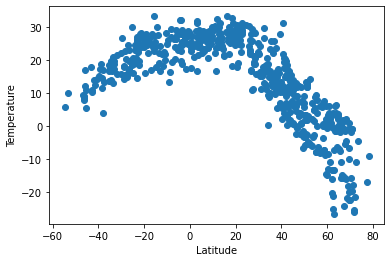

In [22]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

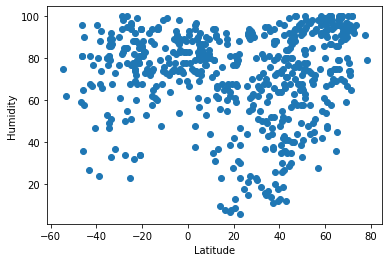

In [23]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

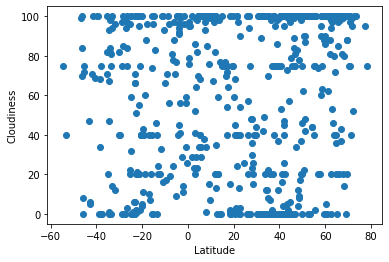

In [24]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

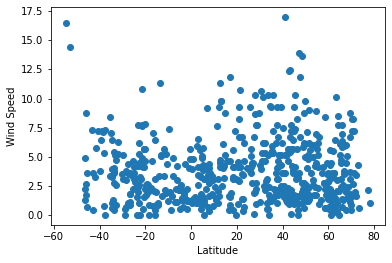

In [25]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
#find all the cities in the north hem (where lat is above 0)
north_hem = weather_data.loc[weather_data["lat"] > 0 ] 
north_hem

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burley,0.37,42.5357,-113.7928,0.98,66,20,12.35,US,1649795105
1,Saint Paul Harbor,5.73,57.7900,-152.4072,5.73,75,20,4.12,US,1649794582
2,Clyde River,-15.87,70.4692,-68.5914,-15.87,78,100,8.23,CA,1649794727
4,Sitka,5.94,57.0531,-135.3300,5.94,28,20,3.60,US,1649794830
5,Kapaa,26.18,22.0752,-159.3190,26.99,79,40,6.69,US,1649795106
...,...,...,...,...,...,...,...,...,...,...
582,Prince Albert,-6.03,53.2001,-105.7677,-6.03,58,100,2.57,CA,1649794987
583,Huron,19.28,41.1501,-82.5499,22.04,55,16,2.06,US,1649795287
587,Boden,0.00,65.8252,21.6886,0.00,97,100,0.68,SE,1649795289
588,Lao Cai,22.37,22.4833,103.9500,22.37,82,0,0.33,VN,1649795289


In [27]:
south_hem = weather_data.loc[weather_data["lat"] < 0 ] 
south_hem

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Faanui,27.96,-16.4833,-151.7500,27.96,72,7,7.04,PF,1649794668
11,Punta Arenas,10.06,-53.1500,-70.9167,10.06,62,40,14.40,CL,1649794876
24,Bundaberg,19.56,-24.8500,152.3500,20.16,97,32,3.09,AU,1649795087
26,Neiafu,26.38,-18.6500,-173.9833,26.38,83,20,0.00,TO,1649795112
27,Avarua,27.03,-21.2078,-159.7750,27.03,78,100,0.51,CK,1649794674
...,...,...,...,...,...,...,...,...,...,...
575,Tshikapa,24.12,-6.4167,20.8000,24.12,74,24,1.07,CD,1649795000
578,Goma,17.32,-1.6792,29.2228,17.32,89,96,1.27,CD,1649795286
584,Mlalo,23.96,-4.9333,38.9333,23.96,91,100,2.36,TZ,1649795288
585,Mahajanga,27.43,-15.7167,46.3167,27.43,62,74,6.43,MG,1649794749


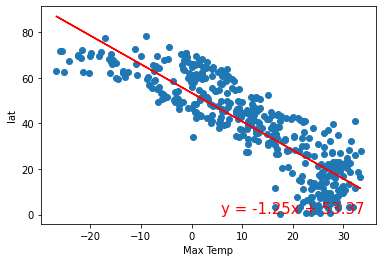

The r-value is: -0.8618406295827464


In [28]:
x_values = north_hem["Max Temp"]
y_values = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("lat")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

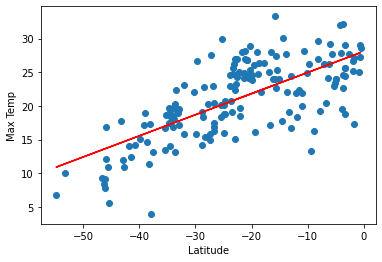

The r-value is: 0.705551818134589


In [29]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_south_temp = south_hem["Max Temp"]
x_south_lat = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_temp)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_lat, y_south_temp)
plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

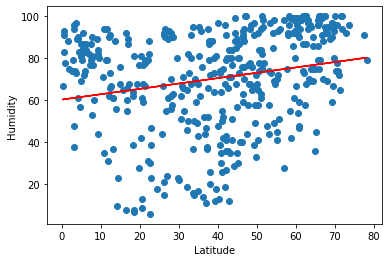

The r-value is: 0.2208859259300956


In [30]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_hum = north_hem["Humidity"]
x_lat = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat,y_hum)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

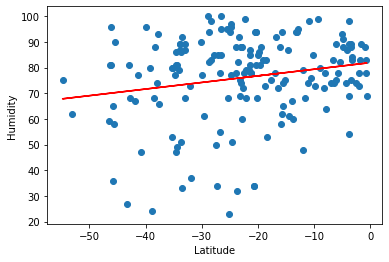

The r-value is: 0.19945930014771782


In [31]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_hum_south = south_hem["Humidity"]
x_south_lat = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_hum_south)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_lat,y_hum_south)
plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

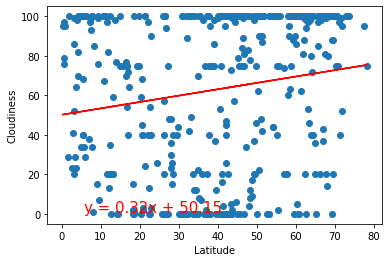

The r-value is: 0.16933879721862946


In [32]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_cloud = north_hem["Cloudiness"]
x_lat_c = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_c, y_cloud)
regress_values = x_lat_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat_c,y_cloud)
plt.plot(x_lat_c,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

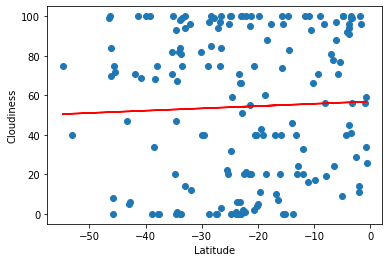

The r-value is: 0.04036235615650533


In [33]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_c_south = south_hem["Cloudiness"]
x_south_c = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_c, y_c_south)
regress_values = x_south_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_c,y_c_south)
plt.plot(x_south_c,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

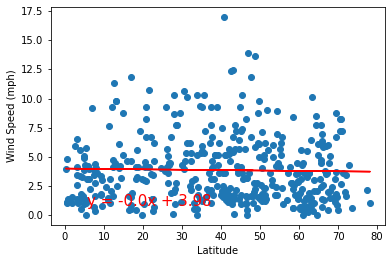

The r-value is: -0.024340794769089274


In [34]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_wind = north_hem["Wind Speed"]
x_lat_w = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_w, y_wind)
regress_values = x_lat_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat_w,y_wind)
plt.plot(x_lat_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

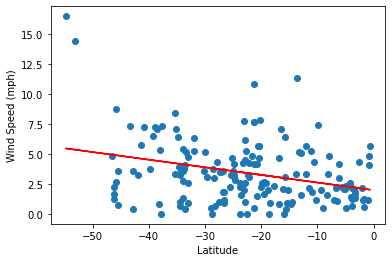

The r-value is: -0.31276220008893246


In [35]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_w_south = south_hem["Wind Speed"]
x_south_w = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_w, y_w_south)
regress_values = x_south_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_w,y_w_south)
plt.plot(x_south_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")